In [13]:
# Import libraries
from __future__ import division
import pandas as pd
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame

In [2]:
data=pd.read_csv('DOB_Permit_Issuance.csv',low_memory=False)

In [3]:
data.head(5)

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BROOKLYN,3138803,830,53 STREET,321583381,1,A2,Y,05665,00019,...,NY,11220,9176938038,03/31/2019 12:00:00 AM,3611957,40.638961,-74.004688,38.0,106.0,Sunset Park East
1,QUEENS,4446007,40-15,164 STREET,421160745,1,A1,N,05339,00009,...,NY,11358,7189612050,03/31/2019 12:00:00 AM,3611953,40.761361,-73.801957,19.0,1171.0,Murray Hill
2,BROOKLYN,3174354,1566,W 6 ST,321268793,1,A1,N,06600,00034,...,NY,11204,9173880821,03/31/2019 12:00:00 AM,3611958,40.609069,-73.979896,44.0,432.0,Bensonhurst East
3,STATEN ISLAND,5037134,220,LONDON ROAD,520277539,1,A2,Y,02268,00031,...,NY,10306,5162334845,03/31/2019 12:00:00 AM,3611954,40.578749,-74.135101,50.0,279.0,Todt Hill-Emerson Hill-Heartland Village-Light...
4,BROOKLYN,3190899,2072,W 10 STREET,321365232,1,A1,N,07095,00038,...,NY,11223,9177518899,03/31/2019 12:00:00 AM,3611955,40.596843,-73.981437,47.0,402.0,Bensonhurst East


In [4]:
#How many building permits are issued in NYC each year till 2018?
data = data[data['Permit Status']=='ISSUED']
data['Issuance Date'] = pd.to_datetime(data['Issuance Date'],format='%m/%d/%Y %H:%M:%S %p') #format date to perform datetime functions
data=data[data['Issuance Date'].dt.year != 2019]
data['Issuance Date'].dt.year.value_counts() #counting values by year using datetime function


2017.0    193541
2016.0    188861
2015.0    180409
2014.0    168824
2018.0    167703
2013.0    159146
2007.0    155546
2006.0    152894
2008.0    148436
2005.0    147385
2012.0    146598
2011.0    142490
2004.0    135378
2010.0    134588
2009.0    134317
2003.0    120196
2002.0    109782
2001.0    103214
2000.0     98719
1999.0     89671
1998.0     80866
1997.0     71321
1996.0     65322
1995.0     61669
1994.0     59758
1993.0     56702
1992.0     51426
1991.0     44578
1990.0     22981
1989.0      2969
Name: Issuance Date, dtype: int64

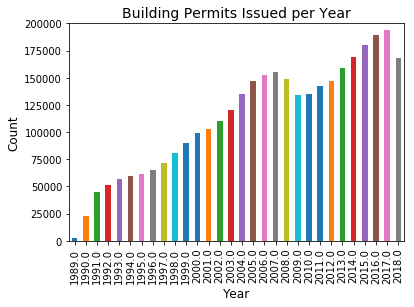

In [5]:
#Plotting the data

data['Issuance Date'].dt.year.value_counts().sort_index().plot(kind='bar') #sorting index so data is in order by year

plt.title('Building Permits Issued per Year', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Count', size=12)
plt.ylim(0,200000)
plt.show()

In [6]:
#Which type of permits are most common?

data['Permit Type'].value_counts().sort_values(ascending=False)

EW    1503605
PL     683647
EQ     524665
AL     301141
NB     217252
SG      74104
DM      49112
FO      41784
Name: Permit Type, dtype: int64

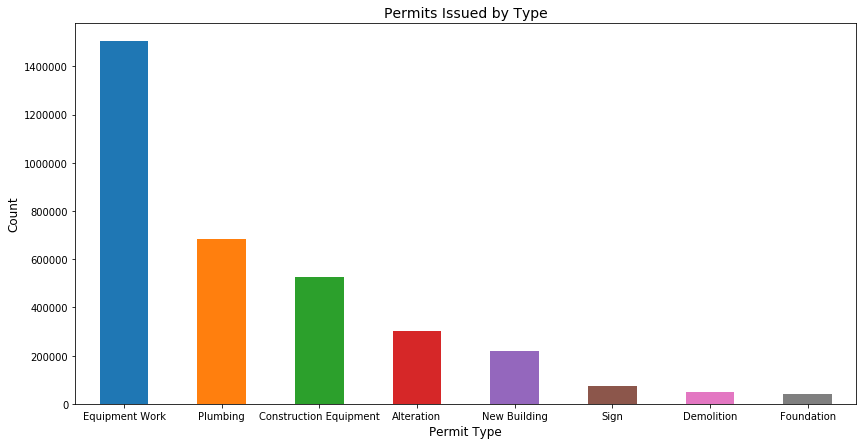

In [7]:
#Mapping permit type with the full form to make it more readable

data['Permit Type'] = data['Permit Type'].map({'EW': 'Equipment Work', 'PL': 'Plumbing',
                                            'EQ': 'Construction Equipment', 'AL': 'Alteration',
                                            'NB': 'New Building','SG': 'Sign', 'DM': 'Demolition', 'FO': 'Foundation',
                                            })


#Plotting the data
fig = plt.figure(figsize=(14,7))

data['Permit Type'].value_counts().plot(kind='bar')
plt.title('Permits Issued by Type', size=14)
plt.xlabel('Permit Type',size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')

plt.show()



In [8]:
# Where the most building permits issued between 1989-2018?

data['BOROUGH'].value_counts() 

MANHATTAN        1417760
BROOKLYN          785519
QUEENS            707215
BRONX             286574
STATEN ISLAND     198243
Name: BOROUGH, dtype: int64

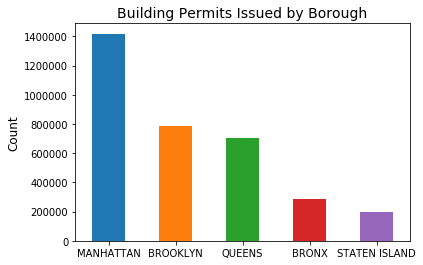

In [9]:
#Plotting the above data

#Plotting the data
data['BOROUGH'].value_counts().plot(kind='bar')

plt.title('Building Permits Issued by Borough', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

In [10]:
#What percentage of borough permits are for residential projects?

boroughs = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in boroughs:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print('\n' + i)
    print(data[data['BOROUGH'] == i]['Residential'].value_counts() / len(data[data['BOROUGH'] == i]))


BROOKLYN
YES    0.479348
Name: Residential, dtype: float64

MANHATTAN
YES    0.258725
Name: Residential, dtype: float64

QUEENS
YES    0.473118
Name: Residential, dtype: float64

STATEN ISLAND
YES    0.602584
Name: Residential, dtype: float64

BRONX
YES    0.419054
Name: Residential, dtype: float64


In [11]:
#How many permits have been issued by zip code?

#Since zipcode for NYC begin with 10000, removed the erroneous data

data = data[data['Zip Code'] >= 10000]  #returns only zip codes that are > or = to 10000

print('Permits by zip code \n')
print(data['Zip Code'].value_counts().sort_index().head(5))  #counting the number of permits by zipcode then sorting them
print('\n')
print('5 zip codes with most permits issued:')
data['Zip Code'].value_counts().sort_values(ascending=False).head(5) #five zip codes with most permits issued


Permits by zip code 

10000.0      175
10001.0    54375
10002.0    34427
10003.0    62068
10004.0    16820
Name: Zip Code, dtype: int64


5 zip codes with most permits issued:


10022.0    87732
10019.0    72432
10013.0    64435
10011.0    63254
10003.0    62068
Name: Zip Code, dtype: int64

In [15]:
#Reading data from NYC Zip Code Boundaries Shapefile

zip_codes = GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp') #read in shape file
zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int) #converting zipcode column to integer data type
data['Zip Code'] = data['Zip Code'].astype(int) #converting zipcode column in Permit Issuance data to integer data type

In [16]:
#Count the number of occurrences for each zip code in the data frame, 
#then converting the data series to a data frame for merging.

counts = data['Zip Code'].value_counts()
counts = counts.to_frame(name='count')
counts = counts.reset_index()

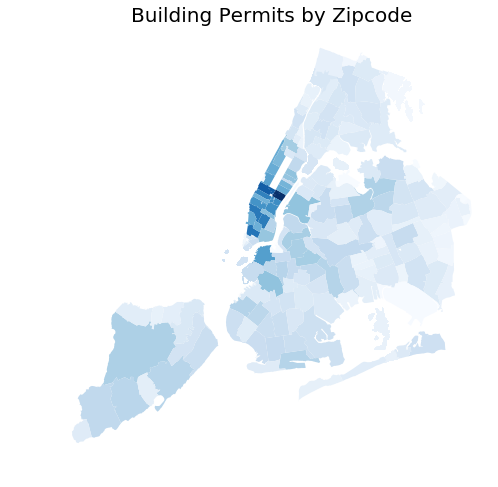

In [22]:
#Merge the number of occurences for each zip code, with the corresponding zip code polygon

counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

#Dropping all NaNs in the geometry column.

counts = counts.dropna() #drop null values

#Plotting the data
fig, ax = plt.subplots(figsize = (8,8))

counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)

plt.title('Building Permits by Zipcode', size=20)
plt.axis('off')
plt.show()
